In [9]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%watermark --iversions

matplotlib: 3.5.1
pandas    : 1.4.1



In [3]:
#df = pd.read_csv('data/covid19-google.csv')  # google data is big and is the same as CAN data
df = pd.read_csv('data/CAN-health_outcomes.csv')
df.head(3)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,...,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalDose1,DailyDose1,TotalDose2,DailyDose2,TotalBooster,DailyBooster
0,1,ALBERTA,AB,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NWT,NT,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,YUKON,YT,0,2020/01/25 12:00:00+00,0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[df['Abbreviation'] == 'ON']
df['date'] = pd.to_datetime(df['SummaryDate'].apply(lambda d: d.split(' ')[0])).rename('date')
df = df.set_index('date')
df.head(3)

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,...,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalDose1,DailyDose1,TotalDose2,DailyDose2,TotalBooster,DailyBooster
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,6,ONTARIO,ON,1,2020/01/25 12:00:00+00,1,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,17,ONTARIO,ON,0,2020/01/26 12:00:00+00,1,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,31,ONTARIO,ON,1,2020/01/27 12:00:00+00,2,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df

,OBJECTID,Province,Abbreviation,DailyTotals,SummaryDate,TotalCases,TotalRecovered,DailyRecovered,TotalDeaths,DailyDeaths,...,TotalICU,DailyICU,TotalVaccinated,DailyVaccinated,TotalDose1,DailyDose1,TotalDose2,DailyDose2,TotalBooster,DailyBooster
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,6,ONTARIO,ON,1,2020/01/25 12:00:00+00,1,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,17,ONTARIO,ON,0,2020/01/26 12:00:00+00,1,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,31,ONTARIO,ON,1,2020/01/27 12:00:00+00,2,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,43,ONTARIO,ON,0,2020/01/28 12:00:00+00,2,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,58,ONTARIO,ON,0,2020/01/29 12:00:00+00,2,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,12291,ONTARIO,ON,2617,2022/02/22 12:00:00+00,1090101,1057829.0,3911.0,12288,24.0,...,319.0,-5.0,31528557.0,27642.0,12551772.0,1881.0,11969223.0,5658.0,6890455.0,19673.0
2022-02-23,12306,ONTARIO,ON,1425,2022/02/23 12:00:00+00,1091526,1060530.0,2701.0,12306,18.0,...,319.0,0.0,31559024.0,30467.0,12554685.0,2913.0,11976167.0,6944.0,6908768.0,18313.0
2022-02-24,12321,ONTARIO,ON,2404,2022/02/24 12:00:00+00,1093930,1063134.0,2604.0,12347,41.0,...,302.0,-17.0,31588850.0,29826.0,12557712.0,3027.0,11983625.0,7458.0,6925565.0,16797.0


In [ ]:
# select date time after first wastewater data entry
df = df.loc[pd.Timestamp('2021-04-01'):, :]

df.isna().sum() ## only missing dose information

**Interesting COVID fields for:**:

**features**
* TotalCases - divide by population?; early indicator of hospitilizations
* TotalRecovered - divide by population; recovered population?
* TotalActive - divide by population; indicates ongoing infection potential
* TotalVaccinated - divide by population; indicates ongoing infection potential
* TotalDose1/2/Booster - divide by population; indicates ongoing infection potential (missing some data prior to 2021/06)

**targets**
* TotalCases - divide by population?; early indicator of hospitilizations
* TotalHospitilized - lagging indicator of covid cases; better target; depends on provincial healthcare
* TotalICU - lagging indicator of covid cases; worse target; depends on provincial healthcare
* DailyDeaths - lagging indicator of covid cases; worse target; depends on provincial healthcare

<AxesSubplot:xlabel='date'>

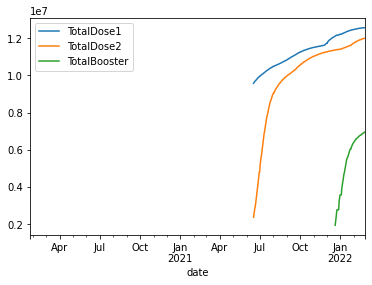

In [5]:
## missing dose information for alot of samples
df.loc[:, ['TotalDose1', 'TotalDose2', 'TotalBooster']].plot()